<a href="https://colab.research.google.com/github/KentaEDM/Machine-Learning/blob/main/Modeling_Predict_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [74]:
!pip install nbconvert


In [75]:
!pip install nbformat
!pip install nbconvert


In [76]:
!jupyter nbconvert --to pdf notebook.ipynb


[NbConvertApp] WARNING | pattern 'notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex

In [78]:
!jupyter nbconvert mynotebook.ipynb --to pdf

[NbConvertApp] WARNING | pattern 'mynotebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kentaedmonda","key":"3b222347e721389ec8b1fc8f53f7f7c3"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Sep  8 06:52 kaggle.json


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset

  0% 0.00/652k [00:00<?, ?B/s]
100% 652k/652k [00:00<00:00, 116MB/s]


In [ ]:
!unzip /content/adult-income-dataset.zip

Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Pediksi Pendapatan melalui Algoritma Random Forest Classifer**

Project ini bertujuan untuk memprediksi pendapatan orang-orang berdasarkan beberapa variabel, seperti umur, pendidikan, gender, total jam kerja, dan lainnya.



# 1. Importing the required libraries for EDA

Berikut merupakan modul yang digunakan dalam project EDA dan Machine Learning Model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# 2. Loading the data into data frame

<font size='2'>Konversi data menjadi data frame melalui pandas merupakan aspek penting agar segala proses pengerjaan project lebih efektif dan efisien.

**About Dataset**

<font size='2'>Dataset yang bertujuan untuk memprediksi pendapatan tahunan individu dipengaruhi oleh berbagai faktor, seperti tingkat pendidikan, usia, jenis kelamin, pekerjaan, dan lain sebagainya.Secara garis besar, dataset ini berisi *feature* dan *label* sebagai variabel independen dan variabel dependen, di mana kolom income merupakan target label untuk diprediksi. Dataset ini secara mentah berisi sebanyak **15 kolom** dan **48842 baris**. Data diambil dari Kaggle: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset</font>







In [ ]:
#Membaca dataset
df = pd.read_csv('/content/adult.csv')
#Memunculkan 5 baris data
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 3. Preprocessing Data

<font size='2'>Melakukan sebuah pembersihan data dan mengeliminasi beberapa data. Tujuannya adalah untuk memilih beberapa kolom dan baris yang relevan untuk dieksplor dan modelisasi kedepannya.</font>

In [ ]:
df.dtypes #Memeriksa tipe data seluruh kolom

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
df.isna().sum() #Melihat apakah ada missing values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.duplicated().sum() #Memeriksa data yang terduplikat


52

In [ ]:
df.drop_duplicates(inplace=True) #Menghapus duplikat data

<font size='2'>Terdapat sebuah nilai "?" pada beberapa tabel, sehingga diharuskan untuk membersikan data tersebut demi efektivitas modeling dan eksplorisasi data.</font>

In [ ]:
#Mengubah unformatted value pada dataset
#Terdapat value "?", cara mengatasinya dengan mengubah menjadi value NA
df.replace('?', pd.NA, inplace=True)

In [ ]:
df.isna().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df.dropna(inplace=True) #Menghapus missing value yang dari nilai "?"

In [ ]:
#drop column yang tidak berpengaruh
#fnlwgt column tidak memiliki pengaruh yang signifikan dalam proses modelling data
df = df.drop('fnlwgt', axis=1)

In [ ]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 4. Exploratory Data Analysis
 **4.1 Univariate analysis**
<font size='2'>
*   Univariate bertujuan untuk melihat informasi data hanya dari satu variabel saja
*   Juga bertujuan untuk memperoleh gambaran distribusi frekuensi masing-masing variabel yang diteliti
</font>
<br>
<br>


Melihat gambaran descriptive statistics - **Numerical columns**

In [ ]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,10.119314,1102.576270,88.687593,40.942512
std,13.215349,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Melihat gambaran descriptive statistics - **Categorical columns**


In [ ]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


In [ ]:
df['education'].unique() #melihat kolom unique pada education

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])


<font size='2'>
1.Seperti yang dapat dilihat, kolom 'education' dan 'educational-num' memiliki nilai yang mirip.<br>
2.education' memiliki  nilai dalam bentuk string, sedangkan 'educational-num' memiliki nilai numerik.<br>
3.Nantinya, kolom education akan dihapus dan hanya dipakai education-num,
karena data numerical lebih digunakan dalam modeling data.
</font>














In [ ]:
df['age'].describe() #melakukan basic deskripsi statistic untuk melihat distribusi kolom age

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

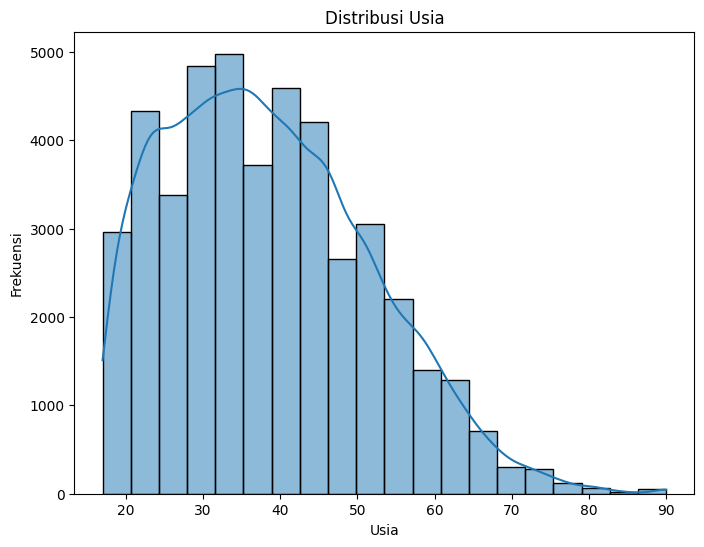

In [ ]:
#Visualisasi distribusi frekuensi data umur
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


<font size='2'>Berdasarkan visualisasi histogram dan metode describe diatas,

*   <font size='2'>Kolom 'age' memiliki 25% umur dibawah 28

*   Kolom 'age' memiliki 50% umur dibawah 37 </font>
*   Kolom 'age' memiliki 75% umur dibawah 47 </font>
<br> <font size='2'>Nilai umur yang terbanyak berada pada antara umur 17 hingga 50</font>


 </font>



In [ ]:
print(f'Total jumlah orang yang berumur 17-50 : {len(df[df["age"].between(17,50)])} orang')

Total jumlah orang yang berumur 17-50 : 36495 orang


<font size='2'>Bagaimana distribusi dari kolom workclass?</font>

In [ ]:
df['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

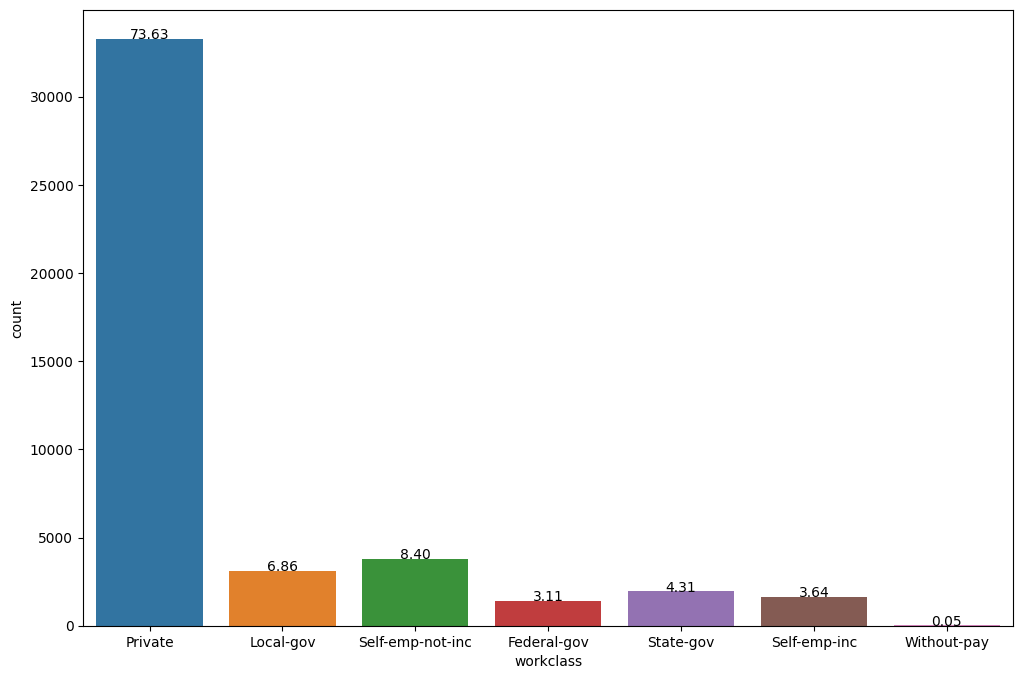

In [ ]:
#Melihat perbandingan jumlah total pekerja pada seluruh data melalui visualisasi
plt.figure(figsize=(12,8))

total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()


<font size='2'>


*   Sektor Private merupakan pekerjaan yang paling dominan dalam data ini



</font>




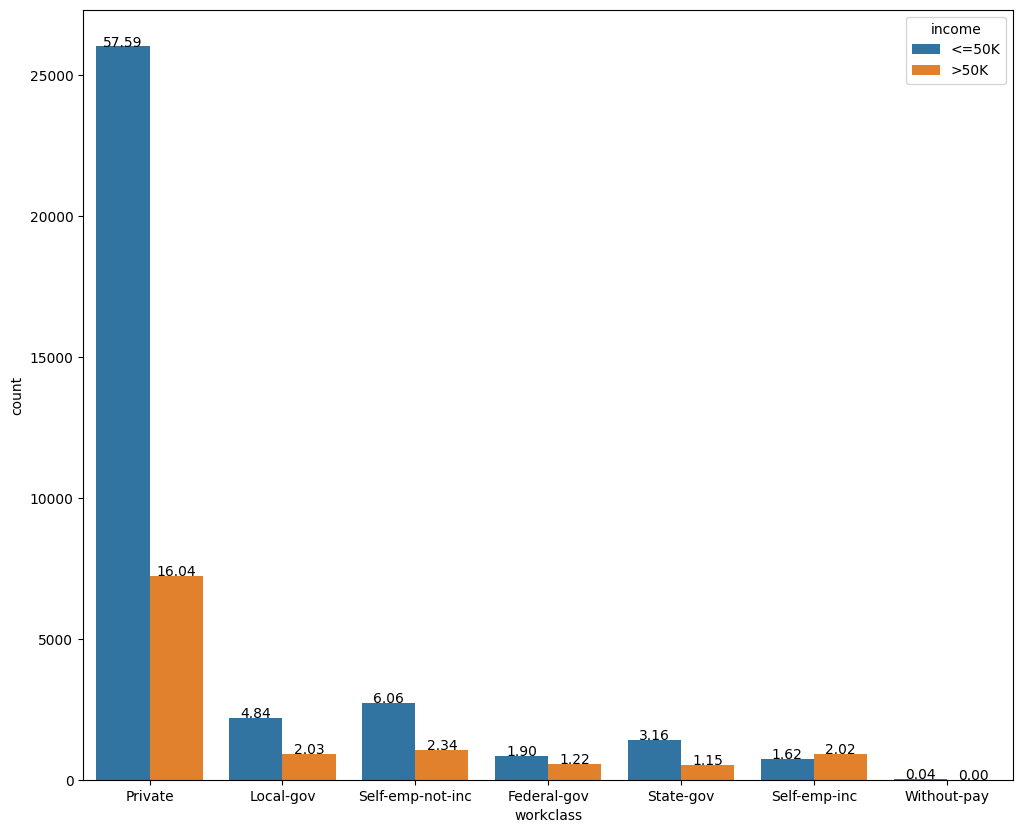

In [ ]:
#Visualisasi persebaran peminatan pekerjaan dan perbandingan pendapatan pada masing-masing pekerjaan
plt.figure(figsize=(12,10))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

**Perbandingan Total Income Berdasarkan Pekerjaan**

*   <font size='2'>Private Sector merupakan pekerjaan paling banyak yang memiliki pendapatan kurang dari 50K
*   Private sector juga merupakan pekerjaan yang total pendapatan lebih dari 50K
 </font>





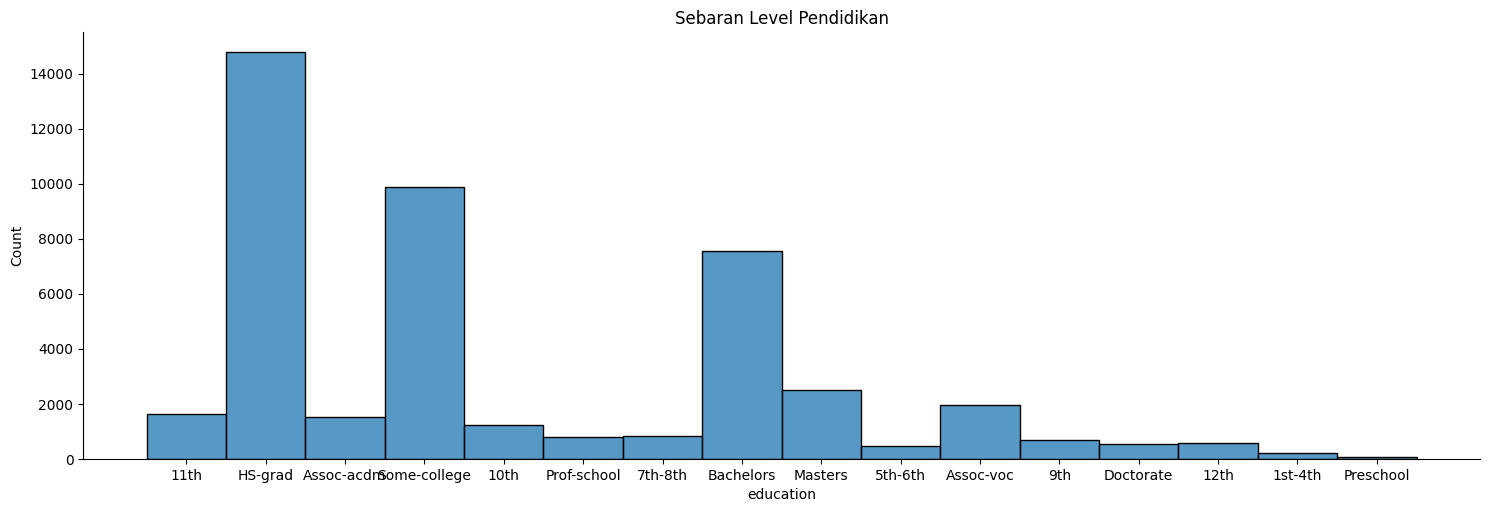

In [ ]:
#Melihat sebaran level pendidikan
sns.displot(x=df['education'], aspect=3)
plt.title('Sebaran Level Pendidikan')
plt.show()

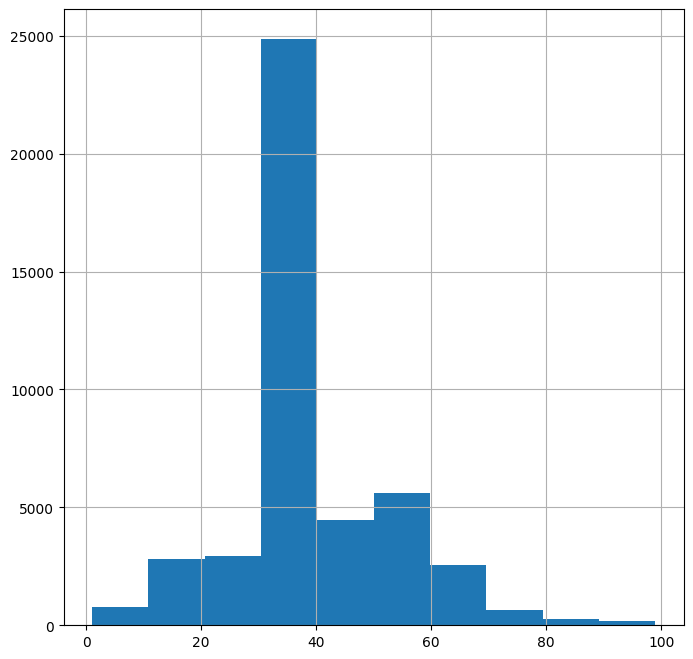

In [ ]:
#Melihat distribusi waktu yang dihabiskan pekerja dalam satu minggu
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

**Total Jam Kerja Per Minggu**
<font size='2'>


*   Kebanyakan orang-orang bekerja selama 30-40 jam per minggu, dengan perkiraan 27,000 orang.
*   Terdapat juga orang-orang yang bekerja selama 80-100 jam per minggu dengan total perkiraan di bawah 100 orang.
*  Sebanyak 75% orang menghabiskan 45 jam atau kurang selama seminggu</font>


**4.1 Bivariate Analysis**
<font size='2'>
*   Bivariate bertujuan untuk melihat hubungan antara dua variabel
*   Mengetahui pengaruh satu variabel dengan yang lain positif atau negatif
</font>



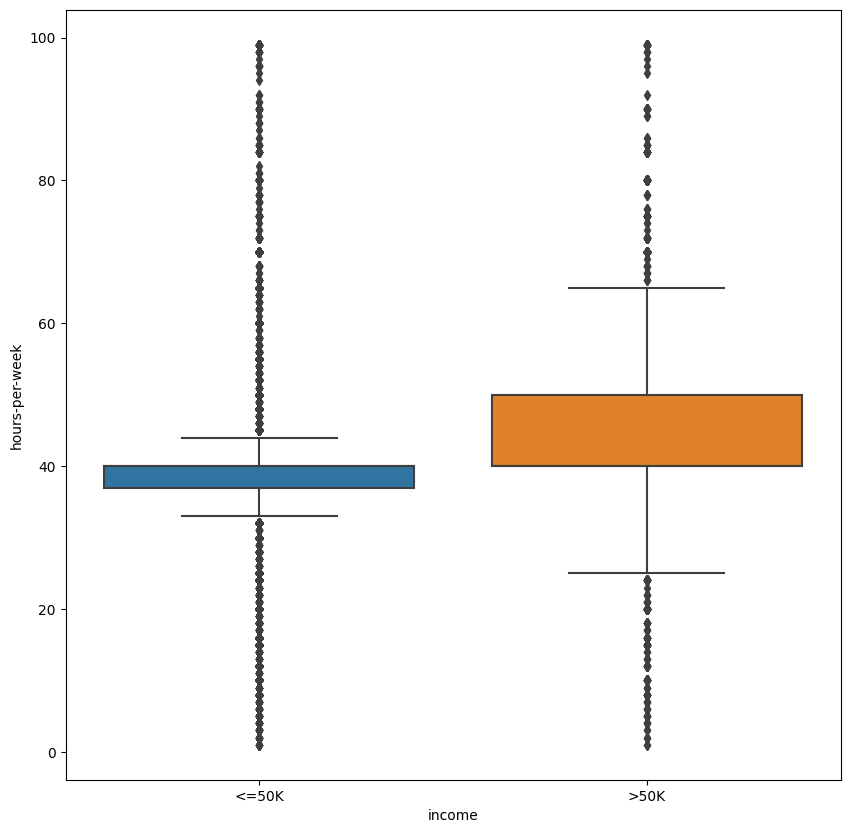

In [ ]:
#Visualisai dua variabel x dan y antara income dan hours-per-week
#Menggunakan visualisasi boxplot untuk deteksi outlier
plt.figure(figsize=(10,10))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.show()

**Pendapatan Berdasarkan Jam Kerja Per-Minggu**
<font size='2'>


*   Median "jam kerja per minggu" untuk kelompok pendapatan yang berpenghasilan >50 ribu lebih besar daripada kelompok pendapatan yang berpenghasilan <=50 ribu.
*   Kelompok pendapatan dengan penghasilan >50 ribu menghabiskan ~44 "jam per minggu" (jam kerja panjang)
*   Kelompok pendapatan yang berpenghasilan <=50 ribu menghabiskan ~37 "jam per minggu".
*   Boxplot untuk kelompok pendapatan <=50rb memiliki rentang yang kecil untuk nilai batas minimum (q1-1.5 IQR) dan batas maksimum (q3+ 1.5 IQR) yaitu (28,48), namun boxplot untuk kelompok pendapatan >50rb memiliki rentang yang besar untuk minimum (q1-1.5 IQR) dan maksimum (q3+ 1.5 IQR) yaitu (23,68).  
*   Kelompok pendapatan dengan penghasilan >50k memiliki jam kerja yang fleksibel
*   Lebih banyak Outlier yang ada pada kelompok pendapatan yang berpenghasilan <=50k.</font>



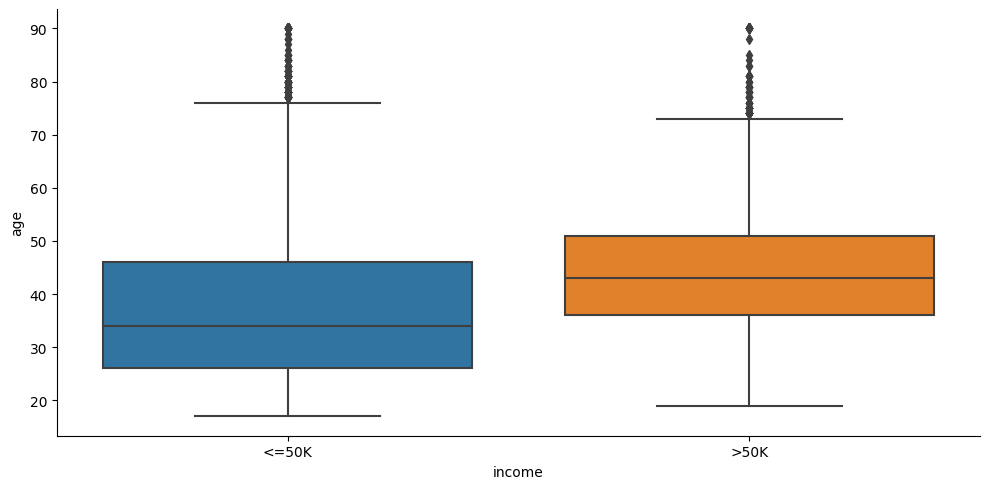

In [ ]:
#Visualisasi hubungan income dan age menggunakan catplot
sns.catplot(data=df, x='income', y='age', kind='box', aspect=2)

**Pendapatan Berdasarkan Umur**

<font size='2'>

*   Rata-rata orang-orang memiliki pendapatan kurang dari atau sama dengan 50K
dalam rentang umur antara 25-45
*   Sedangkan pendapatan diatas 50K antara umur 37-50  </font>



<br>
<br>



 <font size='3'>**Menambah kolom income baru dengan kategori nilai 0 (<=50) dan 1  (>50)**</font>






In [ ]:
#Menambah kolom baru sebagai representasi income dengan nilai 0 dibawah 50k dan 1 diatas 50k
df['income_num'] = df['income'].map({'<=50K': 0, '>50K': 1})

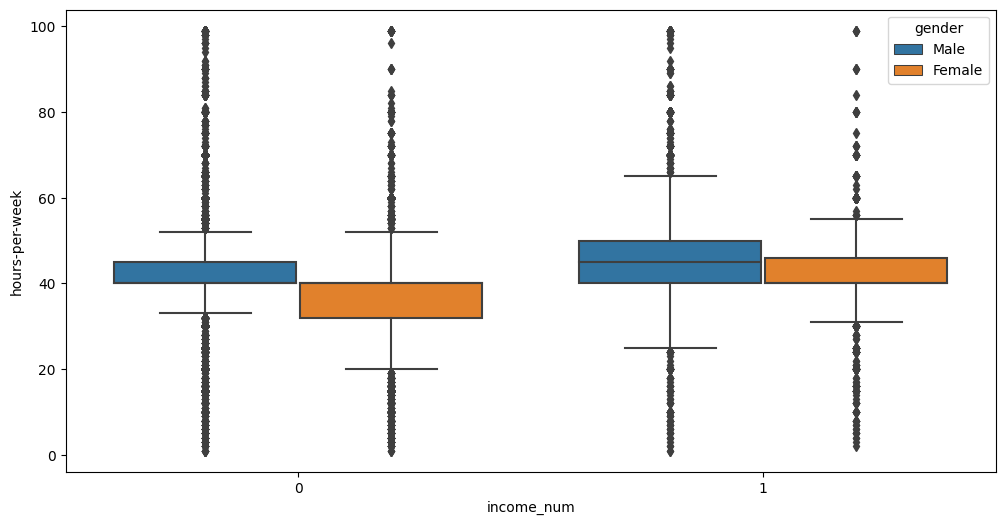

In [ ]:
#Visualisasi perbandingan income dan hours-per-week
plt.figure(figsize=(12,6))
sns.boxplot(x='income_num', y='hours-per-week', hue='gender', data=df)
plt.show()

**Pendapatan Berdasarkan Jam Kerja dan Korelasinya pada Gender**

<font size='2'>

*   Data menunjukkan bahwa pendapatan dibawah 50k gender pria lebih banyak menghabiskan waktu dibandingkan perempuan
*   Perbandingan nilai median pendapatan di bawah 50K antara pria dan perempuan cukup tinggi, yaitu pria dengan rentang 40-45 jam setiap minggu, perempuan 30-40 jam.
*   Begitupun dengan pendapatan diatas 50k lebih menghabiskan banyak waktu dalam satu minggu.
*   Distribusi data pada pendapatan 50k keatas adalah rata-rata diatas 45-50 jam untuk pria, sedangkan perempuan 40-47 jam. </font>


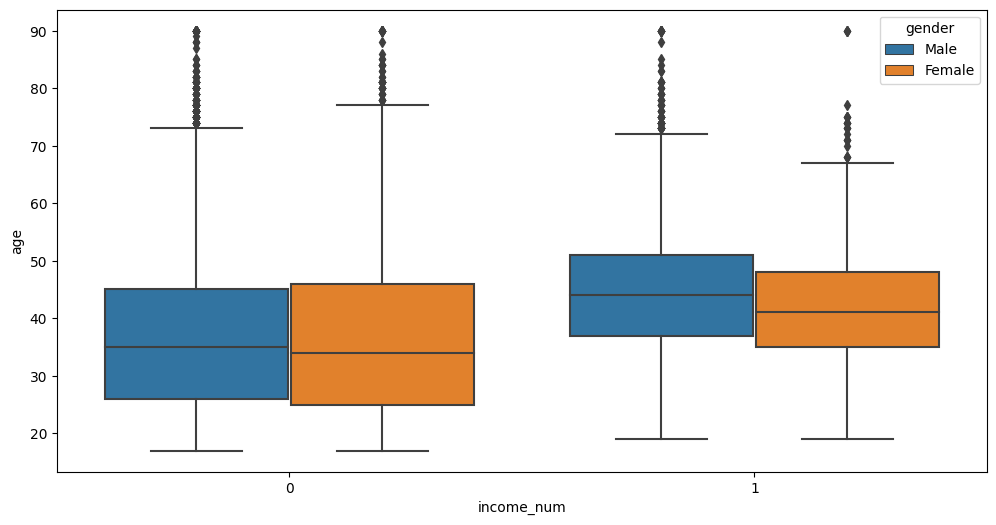

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income_num', y='age', hue='gender', data=df)
plt.show()

**Pendapatan Berdasarkan Umur dan Korelasinya pada Gender**

<font size='2'>

*   Data menunjukkan bahwa total pendapatan dibawah 50k bbaik itu perempuan dan pria banyak tersebar pada rentang umur 25-45
*   Sedangan dengan pendapatan diatas 50k banyak terdistribusi pada rentang umur 37-55.
*   Ini menunjukkan semakin tinggi umur maka akan semakin meningkat pendapatan
</font>

In [ ]:
df.corr() #Melihat korelasi antara masing-masing kolom

<ipython-input-29-646fd27f4ccb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #Melihat korelasi antara masing-masing kolom


,age,educational-num,capital-gain,capital-loss,hours-per-week,income_num
age,1.000000,0.037269,0.079649,0.059258,0.101604,0.236839
educational-num,0.037269,1.000000,0.126982,0.081719,0.146463,0.332981
capital-gain,0.079649,0.126982,1.000000,-0.032137,0.083868,0.221071
capital-loss,0.059258,0.081719,-0.032137,1.000000,0.054141,0.148679
hours-per-week,0.101604,0.146463,0.083868,0.054141,1.000000,0.227146
income_num,0.236839,0.332981,0.221071,0.148679,0.227146,1.000000


# **Preparing data for Modeling**


*   Konversi data categorical menjadi number values agar bisa diproses oleh model
*   Menggunakan teknik one-hot encoding

In [ ]:
#Proses one-hot encoding data, dengan tujuan untuk merubah value menjadi kategorikal numeric
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis =1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = df.drop('capital-loss', axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']	).add_prefix('native-country_')], axis=1)


In [ ]:
df

,age,educational-num,gender,capital-gain,hours-per-week,income,income_num,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,Male,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,Male,0,50,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,Male,0,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,Male,7688,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,Male,0,30,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,Female,0,38,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,Male,0,40,>50K,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,Female,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,Male,0,20,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Mengubah kategori kolom gender dan income
df=df.drop('income_num',axis=1)
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [ ]:
df.columns.values


array(['age', 'educational-num', 'gender', 'capital-gain',
       'hours-per-week', 'income', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'r

<Axes: >

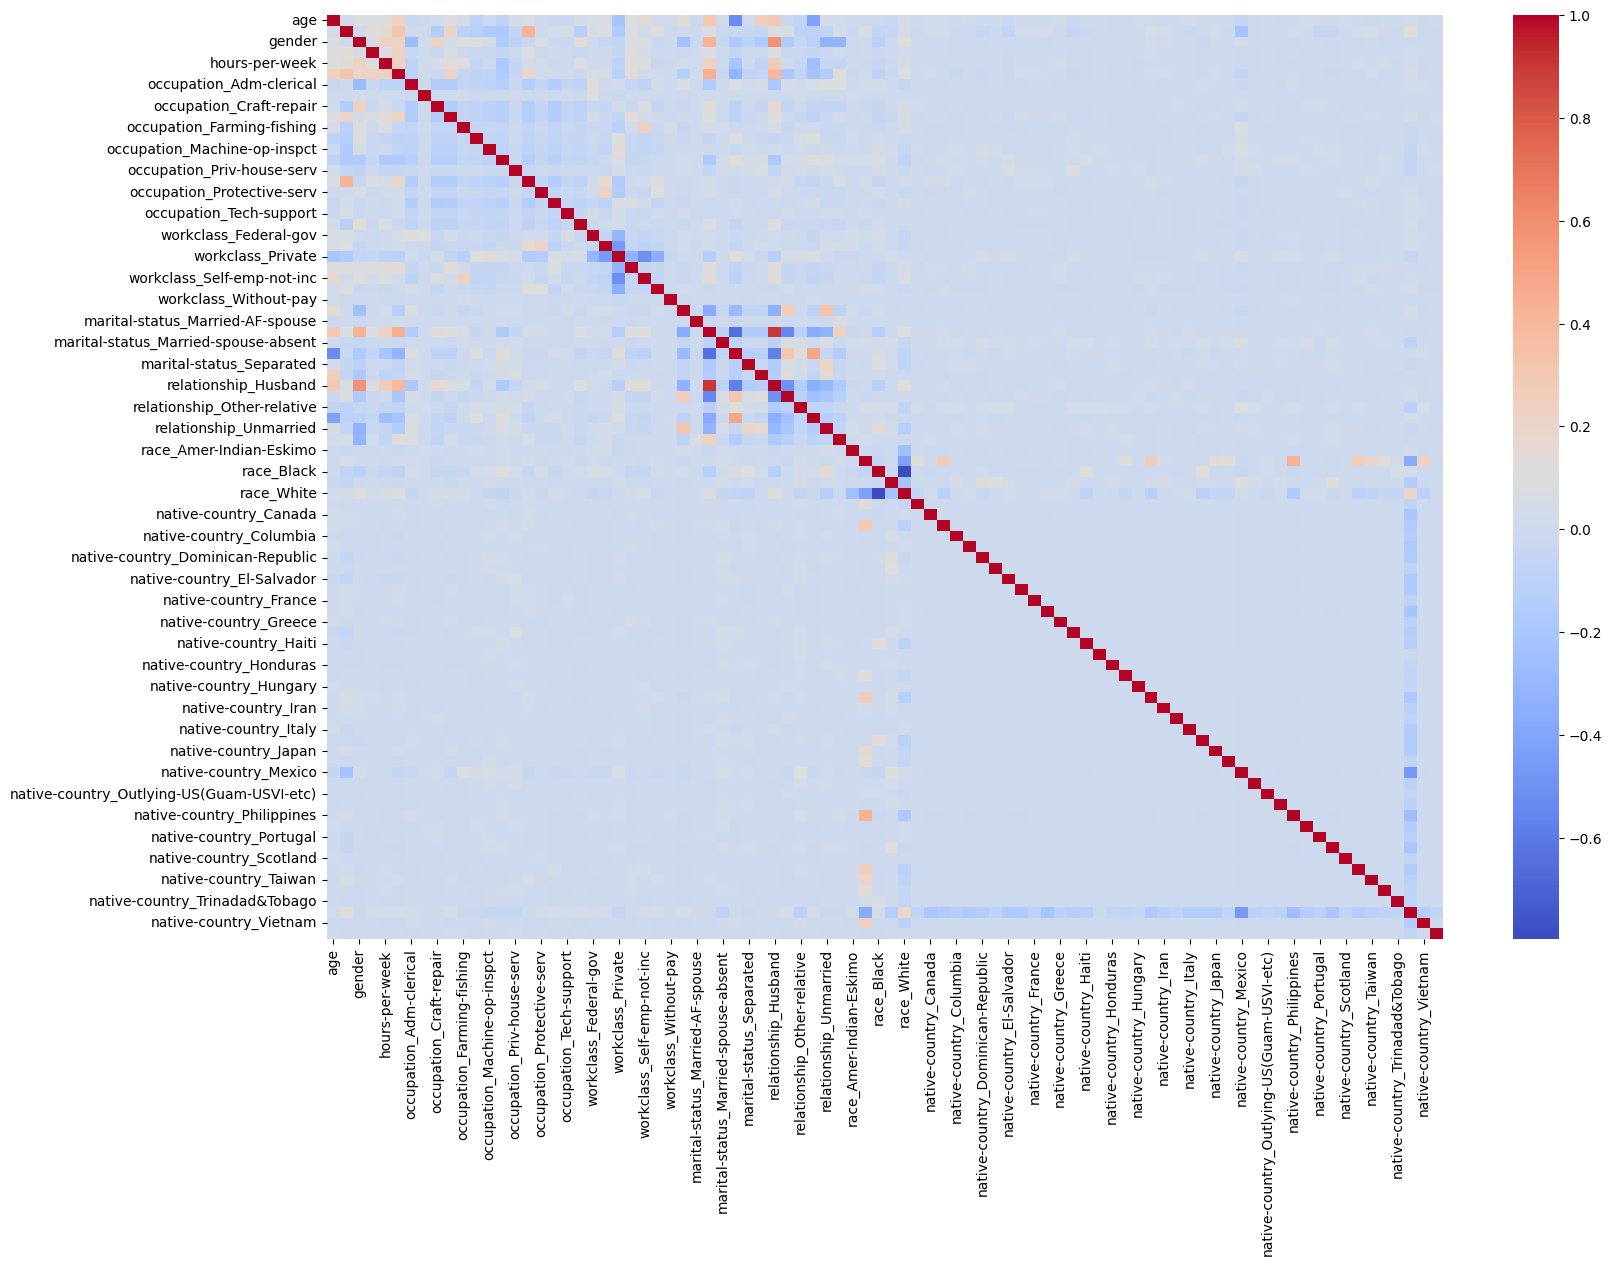

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [ ]:
df.corr()

,age,educational-num,gender,capital-gain,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,0.037269,0.081920,0.079649,0.101604,0.236839,-0.037821,-0.009020,0.012293,0.108037,...,0.005589,0.004710,0.011855,0.000207,-0.007666,-0.000670,0.002831,0.011394,-0.014440,0.003283
educational-num,0.037269,1.000000,0.003455,0.126982,0.146463,0.332981,-0.002603,0.003612,-0.155179,0.201621,...,-0.047193,-0.043694,0.001078,0.016338,0.046132,0.007377,-0.010165,0.131344,-0.010312,-0.006439
gender,0.081920,0.003455,1.000000,0.047471,0.231392,0.215741,-0.277672,0.012216,0.227955,0.030577,...,0.007848,-0.009992,-0.001125,-0.006183,0.006604,-0.006673,-0.008969,-0.008482,-0.002239,0.005184
capital-gain,0.079649,0.126982,0.047471,1.000000,0.083868,0.221071,-0.031159,-0.001363,-0.020525,0.058018,...,-0.004358,-0.006283,-0.003090,-0.001277,0.005580,-0.002872,-0.003138,0.010872,-0.002719,-0.000560
hours-per-week,0.101604,0.146463,0.231392,0.083868,1.000000,0.227146,-0.100499,0.001132,0.043266,0.131222,...,0.004311,-0.010741,0.001415,0.015410,0.000220,0.010311,-0.004190,0.010497,-0.008060,-0.001363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.000670,0.007377,-0.006673,-0.002872,0.010311,-0.004434,-0.001474,-0.000446,-0.004782,0.005573,...,-0.000940,-0.001581,-0.000533,-0.001200,-0.000885,1.000000,-0.000608,-0.082233,-0.001087,-0.000572
native-country_Trinadad&Tobago,0.002831,-0.010165,-0.008969,-0.003138,-0.004190,-0.009505,0.007922,-0.000423,-0.003965,-0.006650,...,-0.000890,-0.001496,-0.000505,-0.001136,-0.000838,-0.000608,1.000000,-0.077861,-0.001030,-0.000542
native-country_United-States,0.011394,0.131344,-0.008482,0.010872,0.010497,0.038571,0.019229,0.005427,0.001708,0.032668,...,-0.120282,-0.202334,-0.068284,-0.153587,-0.113280,-0.082233,-0.077861,1.000000,-0.139202,-0.073229
native-country_Vietnam,-0.014440,-0.010312,-0.002239,-0.002719,-0.008060,-0.016257,0.010768,-0.000755,0.002980,-0.010657,...,-0.001591,-0.002675,-0.000903,-0.002031,-0.001498,-0.001087,-0.001030,-0.139202,1.000000,-0.000968


**Menghapus kolom yang tidak memiliki korelasi tinggi**

*   Tahap ini ditujukan untuk menghapus beberapa kolom yang korelasi tidak terlalu signifikan
*   Korelasinya berdasarkan pada tabel Income
*   Tahapannya melalui sortir dari data yang berkorelasi tinggi hingga korelasi terendah
*   Apabila kolom yang memiliki korelasi rendah, maka akan dihapus melalui serangkaian fungsi yang diterapkan.





In [ ]:
korelasi = df.corr()['income'].abs()
korelasi_tersortir = korelasi.sort_values()
num_cols_to_drop = int (0.8 * len(df.columns))
cols_to_drop = korelasi_tersortir.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [ ]:
df_dropped

,age,educational-num,gender,capital-gain,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,40,1,0,0,0,0,0,1,0,1,0,0,0,0
5,34,6,1,0,30,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


**4.3 Multivariate Analysis**


*   Analisis multivariate ini digunakan untuk melihat korelasi banyak variabel
*   Salah satu tekniknya adalah dengan memanggil fungsi corr untuk melihat korelasi antar satu variabel dengan variabel lainnya
* Tanda dari tingginya korelasi di bawah adlaah angka yang mendekati 1 atau warna gelap merah.



<Axes: >

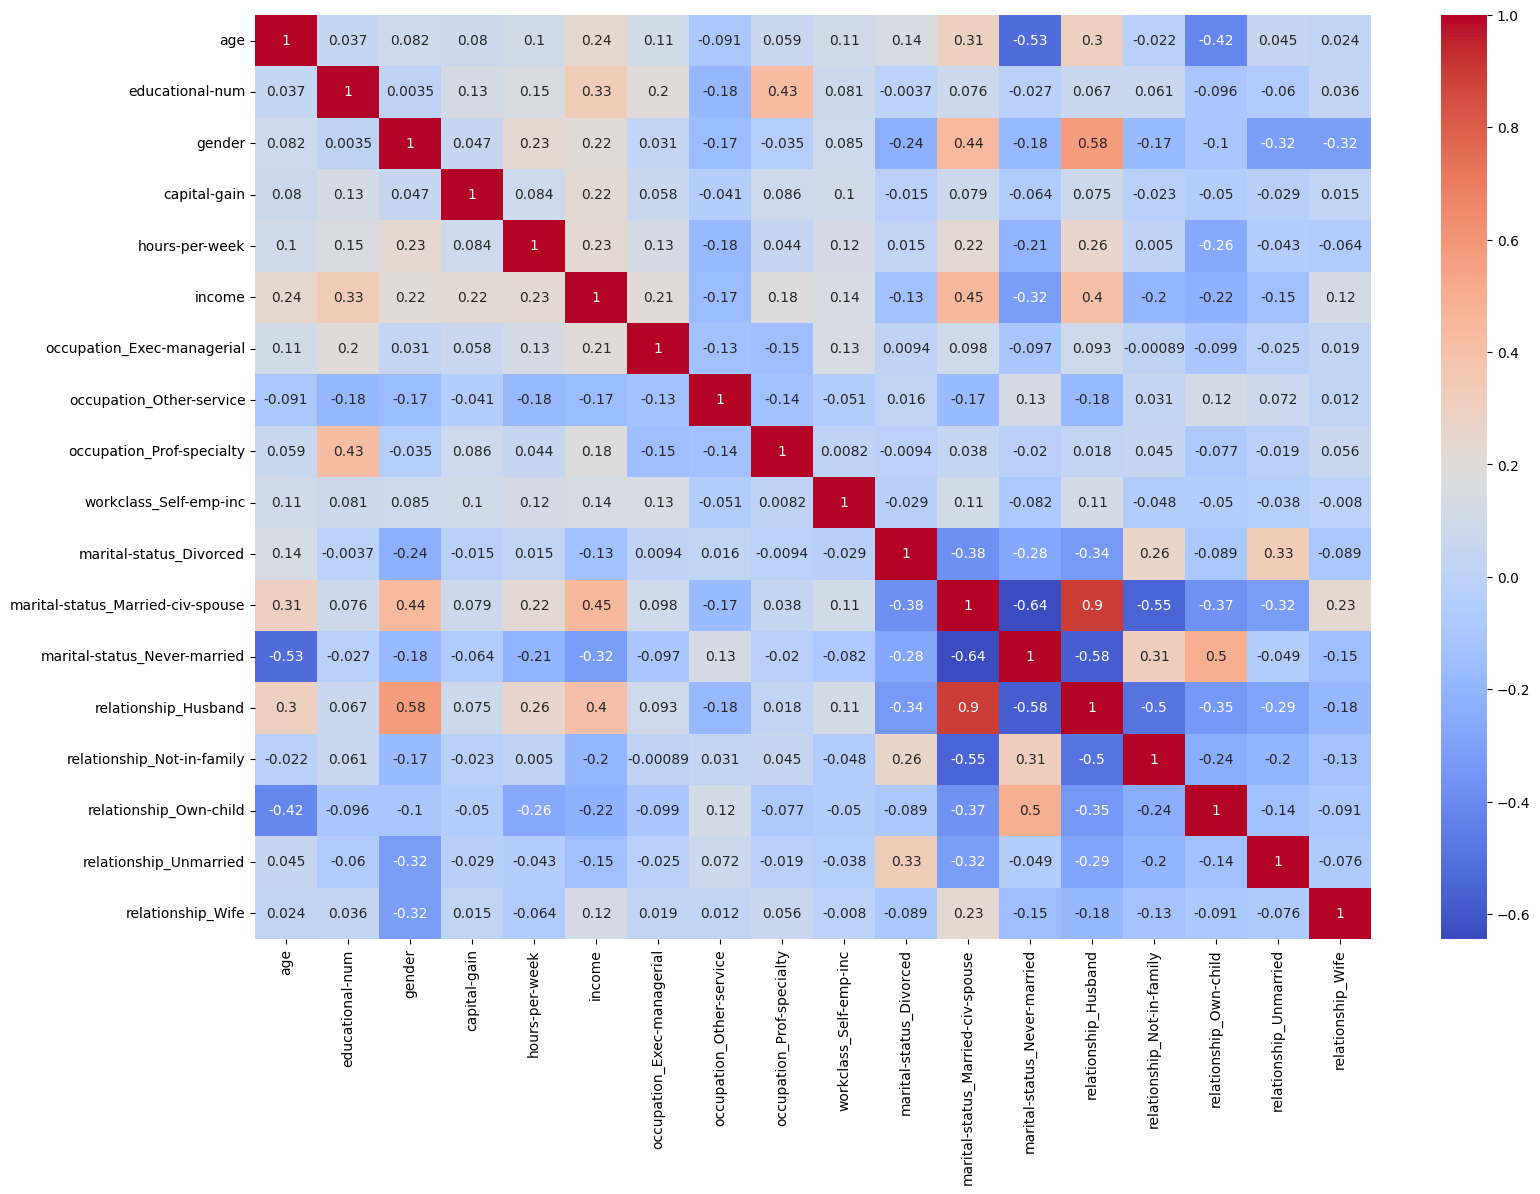

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

**Interpretasi Heatmap Correlation**



*   Tanda yang cenderung mendekati warna merah memiliki korelasi tinggi satu sama lain
*   Tabel Income memiliki korelasi positif terbanyak dalam seluruh kolom, sehingga dapat dikatakan income sebagai variabel dependen dan lainnya sebagai independen


<br>
<br>
<br>

**5.Modeling Data**

 **Tahapan Modeling Data Menggunakan Algoritma Random Forest Classifier**<br>
* Tahap pertama melakukan training data dan testing data menggunakan modul
train_test_split
* Import algoritma RFC (RandomForestClassifier)





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size= 0.2)


In [ ]:
test_df

,age,educational-num,gender,capital-gain,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
25951,19,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13388,26,13,0,0,75,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19761,59,11,1,7298,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22330,44,9,1,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41850,59,3,1,2580,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22844,49,9,1,0,52,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17541,30,9,1,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22260,37,6,1,0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1961,26,13,1,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Membagi data menjadi train data dan test data
x_train = train_df.drop('income', axis=1)
y_train = train_df.income

x_test = test_df.drop('income', axis=1)
y_test = test_df.income

In [ ]:
#Fitting data yang telah dilatih dengan model RFC
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Uji presentase score dari model data
forest.score(x_test, y_test)

0.8296624239070283

**Hasil Akurasi Model**


*   Akurasi Model hanya mencapai 82,9%, maka dari itu diperlukan pengoptimalisasi lagi untuk meningkatkan nilai akurasi




In [ ]:
forest.feature_importances_ #Feature Importances untuk melihat peran hubungan tinggi pada target variabel

array([2.47141187e-01, 1.32126621e-01, 1.40690945e-02, 1.11415874e-01,
       1.21212684e-01, 5.20805338e-03, 3.45469385e-05, 6.09580066e-03,
       2.06547941e-02, 5.13450970e-03, 3.52202008e-03, 4.15931233e-03,
       9.64777618e-03, 2.02032140e-04, 1.87207615e-02, 3.00487746e-03,
       6.57207034e-03, 4.60240197e-03, 4.48591614e-03, 5.12389057e-03,
       5.58438300e-03, 9.72856425e-03, 6.95813245e-03, 8.04420304e-03,
       4.38705113e-03, 2.26303619e-04, 7.30108136e-03, 3.98730687e-04,
       7.49182595e-02, 9.78729618e-04, 3.12489389e-02, 2.10295715e-03,
       2.10702158e-03, 4.13240722e-02, 1.30370735e-02, 1.87182750e-03,
       8.22379829e-03, 6.67344851e-03, 9.48052344e-03, 1.37918483e-03,
       3.09446796e-03, 5.03342064e-03, 9.26842351e-04, 6.26205720e-03,
       3.37262913e-04, 1.44973497e-03, 5.72532617e-04, 3.20255699e-04,
       8.02006850e-04, 2.28392039e-04, 1.75103538e-04, 2.80021368e-04,
       1.07987672e-03, 4.24175730e-04, 1.10418631e-03, 4.65545157e-04,
      

In [ ]:
forest.feature_names_in_ #Feature dengan nama kolom

array(['age', 'educational-num', 'gender', 'capital-gain',
       'hours-per-week', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'relationshi

In [ ]:
#Prediksi peran feature pada gaji
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
imporances = {key: value for key, value in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
importances

{'age': 0.2471411869548978,
 'educational-num': 0.1321266209394863,
 'gender': 0.014069094502772637,
 'capital-gain': 0.1114158743025889,
 'hours-per-week': 0.12121268398693752,
 'occupation_Adm-clerical': 0.005208053377454361,
 'occupation_Armed-Forces': 3.454693852215542e-05,
 'occupation_Craft-repair': 0.006095800658456923,
 'occupation_Exec-managerial': 0.020654794061114243,
 'occupation_Farming-fishing': 0.005134509700466332,
 'occupation_Handlers-cleaners': 0.003522020081879046,
 'occupation_Machine-op-inspct': 0.004159312328629127,
 'occupation_Other-service': 0.009647776182429284,
 'occupation_Priv-house-serv': 0.00020203213977277936,
 'occupation_Prof-specialty': 0.01872076148765566,
 'occupation_Protective-serv': 0.0030048774637478092,
 'occupation_Sales': 0.006572070337000821,
 'occupation_Tech-support': 0.00460240196957732,
 'occupation_Transport-moving': 0.00448591614183137,
 'workclass_Federal-gov': 0.005123890567262365,
 'workclass_Local-gov': 0.0055843830003597895,
 'wo

**Peningkatan Akurasi melalui Hyperparameters Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
#Hyperparameter tunning melalui GridSearchSV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5,10, 30, 50],
    'min_samples_split':[2, 6],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)


In [ ]:
grid_search.fit(x_train, y_train) #Fitting hyperparamter pada data

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.6s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.6s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.6s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.6s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 6],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=6)

In [ ]:
forest = grid_search.best_estimator_
forest.score(x_test, y_test) #Uji skor akurasi model

0.8450470392916436

In [ ]:
importances = dict(zip(forest.feature_names_in_,forest.feature_importances_))
imporances = {key: value for key, value in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
importances #Hasil prediksi

{'age': 0.1551518676541976,
 'educational-num': 0.14082081305774524,
 'gender': 0.0143860560543573,
 'capital-gain': 0.13555713111340167,
 'hours-per-week': 0.09208654424590207,
 'occupation_Adm-clerical': 0.005335711687251273,
 'occupation_Armed-Forces': 8.844184055235584e-05,
 'occupation_Craft-repair': 0.0063616924604688934,
 'occupation_Exec-managerial': 0.03032085855609601,
 'occupation_Farming-fishing': 0.006554437564765853,
 'occupation_Handlers-cleaners': 0.004739797593016007,
 'occupation_Machine-op-inspct': 0.005167386061046641,
 'occupation_Other-service': 0.011932086821915067,
 'occupation_Priv-house-serv': 0.00029362338114340906,
 'occupation_Prof-specialty': 0.02433221312299907,
 'occupation_Protective-serv': 0.003007527913110482,
 'occupation_Sales': 0.005980789252326362,
 'occupation_Tech-support': 0.004466916436188848,
 'occupation_Transport-moving': 0.004350873995547464,
 'workclass_Federal-gov': 0.005138257868831246,
 'workclass_Local-gov': 0.005006988243756945,
 'wo

**Hasil Model Prediksi Pendapatan**

*   Dictionary diatas menunjukkan feature mana yang paling berperan dalam menentukan tingkatan gaji pekerja.
*   5 Teratas dari feature ini adalah umur, pendidikan, gender, capital-gain, dan jam kerja.
* Semakin tinggi pendidikan, semakin besar kemungkinan pendapatan yang didapatkan
* Begitu pula dengan umur, rata-rata umur semakin tinggi, akan berdampak pada peningkatan pendapatan, karena pengalaman biasanya tidak terlepas dari umur.
* Gender pada data ini menunjukkan, pria lebih cenderung memiliki pendapatan lebih besar dari perempuan, salah satu alasannya adalah pria lebih banyak menghabiskan waktu untuk bekerja selama satu minggu

